In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [84]:
dt = pd.read_csv('day.csv')
dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dt.shape

(730, 16)

In [5]:
dt.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dt.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Assigning string values to season instead of numeric values

#spring = 1
dt.loc[(dt['season']==1),'season']= 'spring'
#summer = 2
dt.loc[(dt['season']==2),'season']= 'summer'
#fall = 3
dt.loc[(dt['season']==3),'season']= 'fall'
#winter = 4
dt.loc[(dt['season']==4),'season']= 'winter'

In [9]:
dt['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
dt['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [11]:
# Assigning string values to months instead of numeric values
def object_map_mnth(x):
    return x.map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'sep', 10:'Oct' , 11:'Nov', 12:'Dec'})

In [12]:
dt[['mnth']]=dt[['mnth']].apply(object_map_mnth)

In [13]:
dt['mnth'].astype('category').value_counts()

mnth
Aug      62
Dec      62
Jan      62
July     62
March    62
May      62
Oct      62
April    60
June     60
Nov      60
sep      60
Feb      56
Name: count, dtype: int64

In [14]:
dt['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
def str_map_weekday(x):
    return x.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'})

In [16]:
dt[['weekday']]=dt[['weekday']].apply(str_map_weekday)

In [17]:
dt['weekday'].astype('category').value_counts()

weekday
Mon    105
Sat    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: count, dtype: int64

In [18]:
dt['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [19]:
# clear , partly cloudy = 1
dt.loc[(dt['weathersit']==1),'weathersit']= 'A'

# rainy, mist = 2
dt.loc[(dt['weathersit']==2),'weathersit']= 'B'

# heavy rain, light snow = 3
dt.loc[(dt['weathersit']==3),'weathersit']= 'C'

In [20]:
dt['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

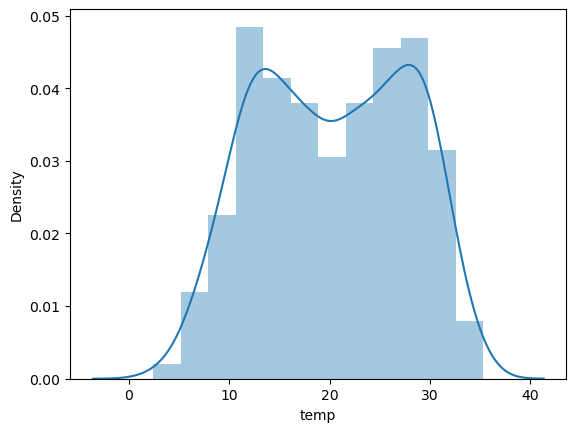

In [22]:
sns.distplot(dt['temp'])

<Axes: xlabel='atemp', ylabel='Density'>

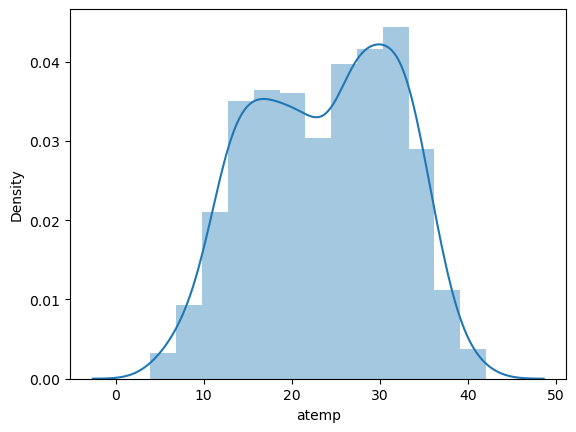

In [23]:
# Actual temp
sns.distplot(dt['atemp'])

<Axes: xlabel='windspeed', ylabel='Density'>

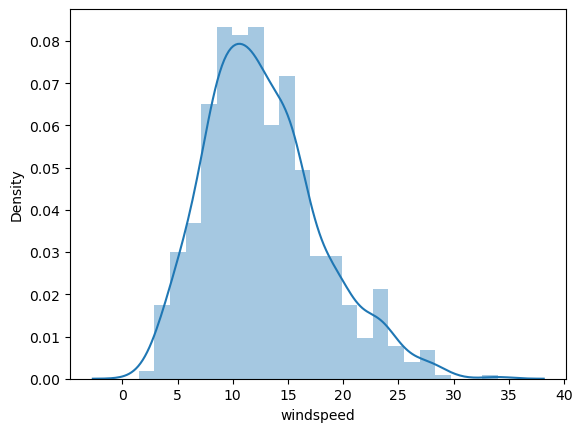

In [24]:
# wind speed 
sns.distplot(dt['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

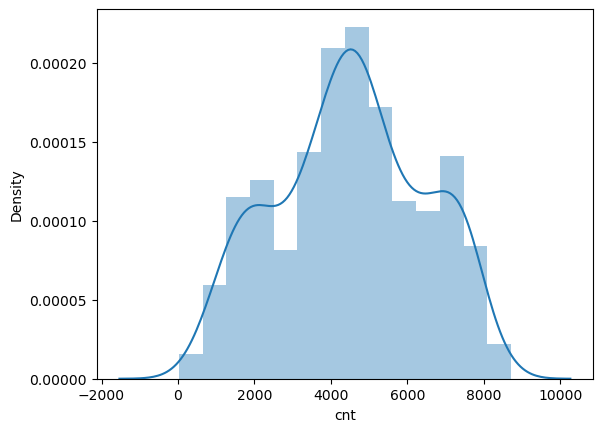

In [25]:
# target variables : count of total number of bikes for both casual and rental
sns.distplot(dt['cnt'])

In [26]:
# convert date to datetime
dt['dteday'] = dt['dteday'].astype('datetime64[ns]')

In [27]:
dt_categorical = dt.select_dtypes(exclude=['float64','datetime64','int64'])

In [28]:
dt_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [29]:
dt_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,NaN,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,NaN,A


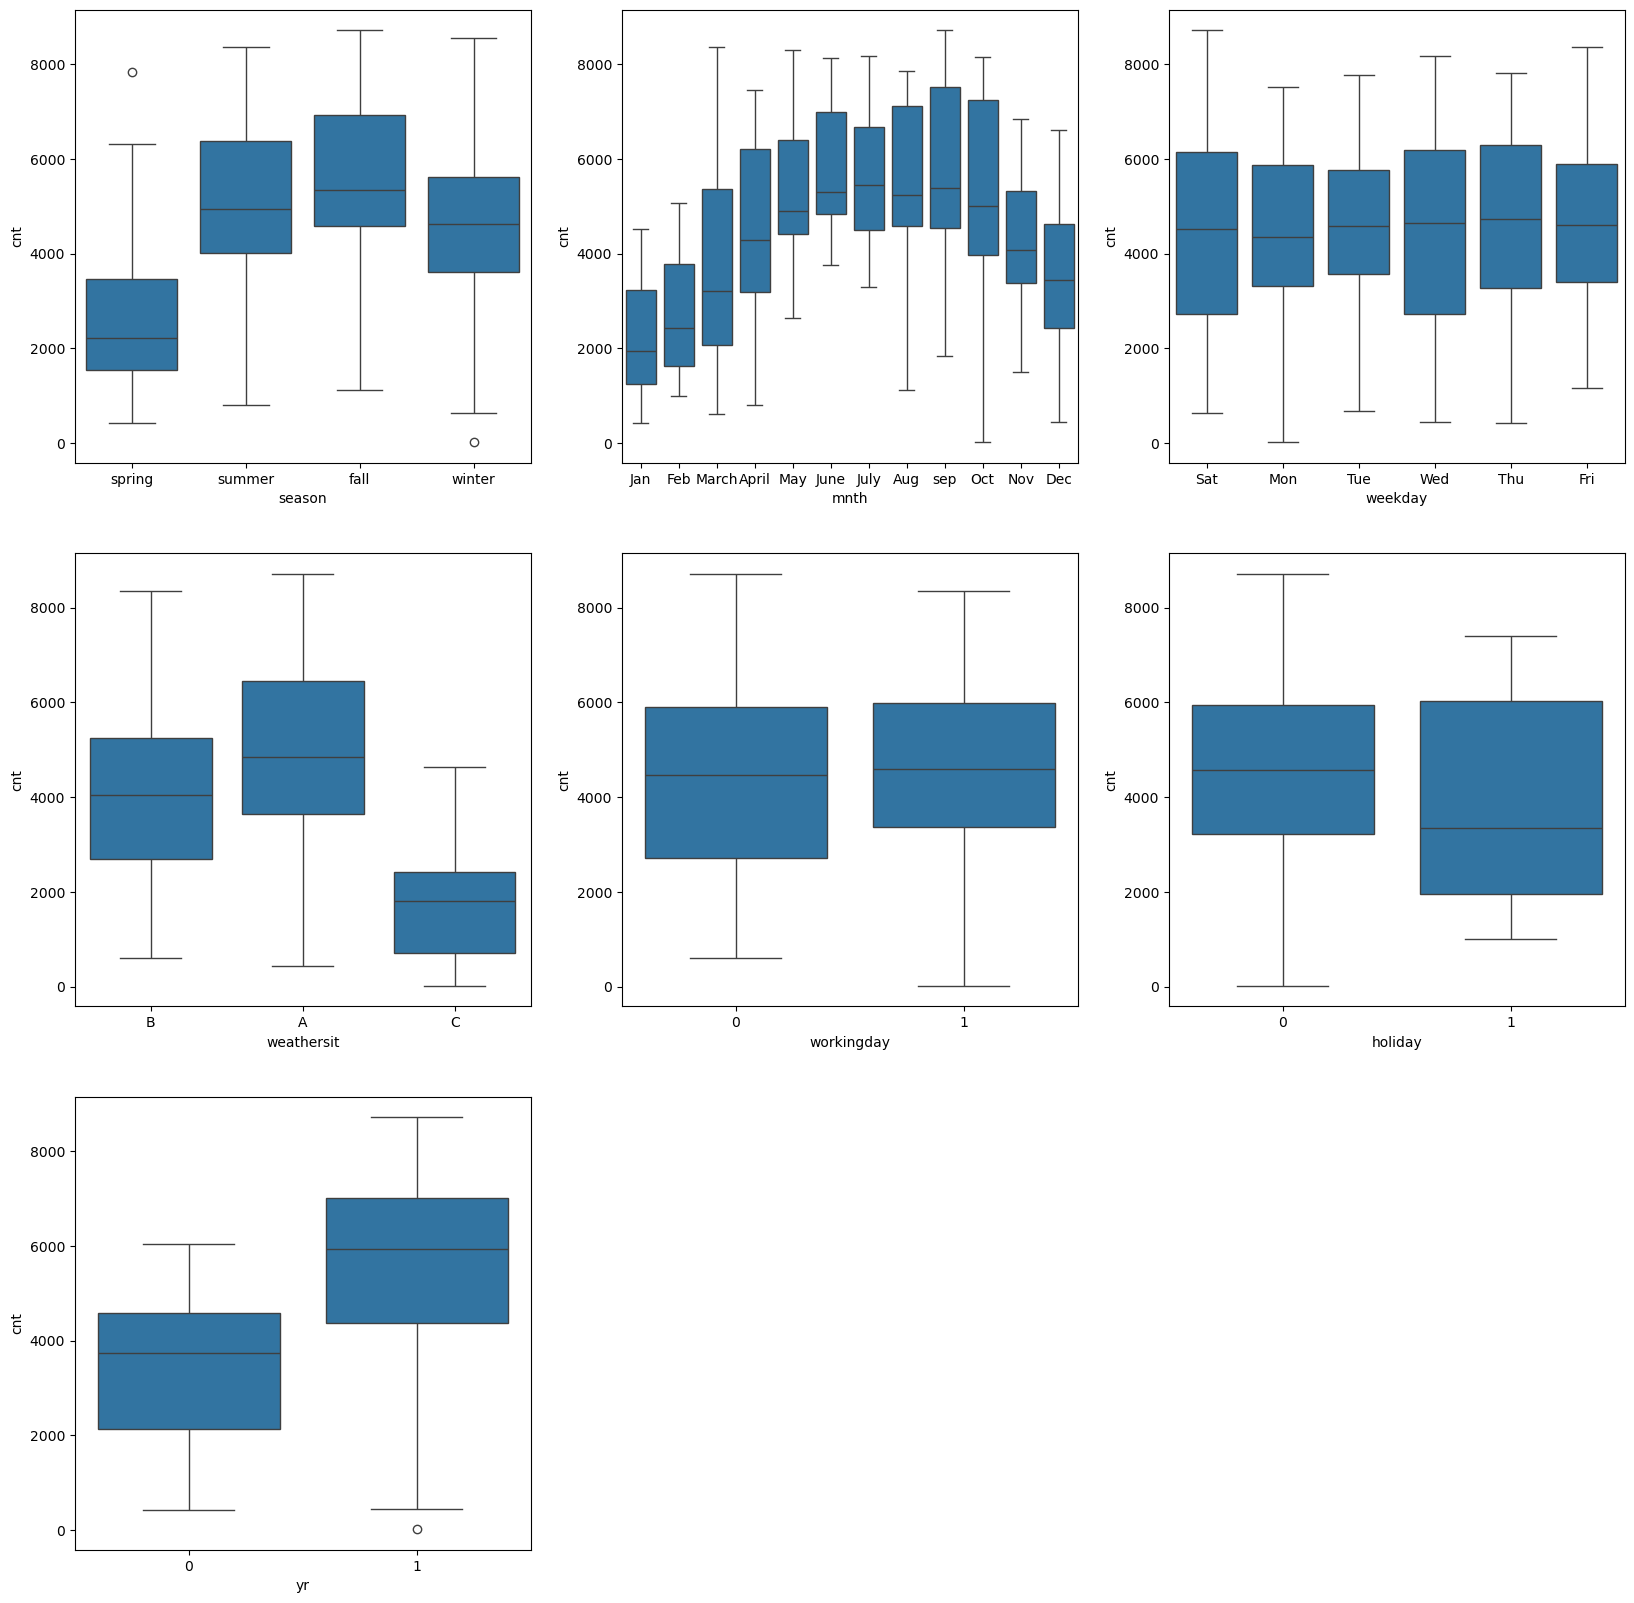

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season' , y= 'cnt', data=dt)

plt.subplot(3,3,2)
sns.boxplot(x='mnth' , y= 'cnt', data=dt)

plt.subplot(3,3,3)
sns.boxplot(x='weekday' , y= 'cnt', data=dt)

plt.subplot(3,3,4)
sns.boxplot(x='weathersit' , y= 'cnt', data=dt)

plt.subplot(3,3,5)
sns.boxplot(x='workingday' , y= 'cnt', data=dt)

plt.subplot(3,3,6)
sns.boxplot(x='holiday' , y= 'cnt', data=dt)

plt.subplot(3,3,7)
sns.boxplot(x='yr' , y= 'cnt', data=dt)
plt.show()

In [31]:
intVarlist= ["casual","registered","cnt"]
for var in intVarlist:
    dt[var]=dt[var].astype("float64")

In [32]:
dt_numeric = dt.select_dtypes(include = ["float64"])
dt_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


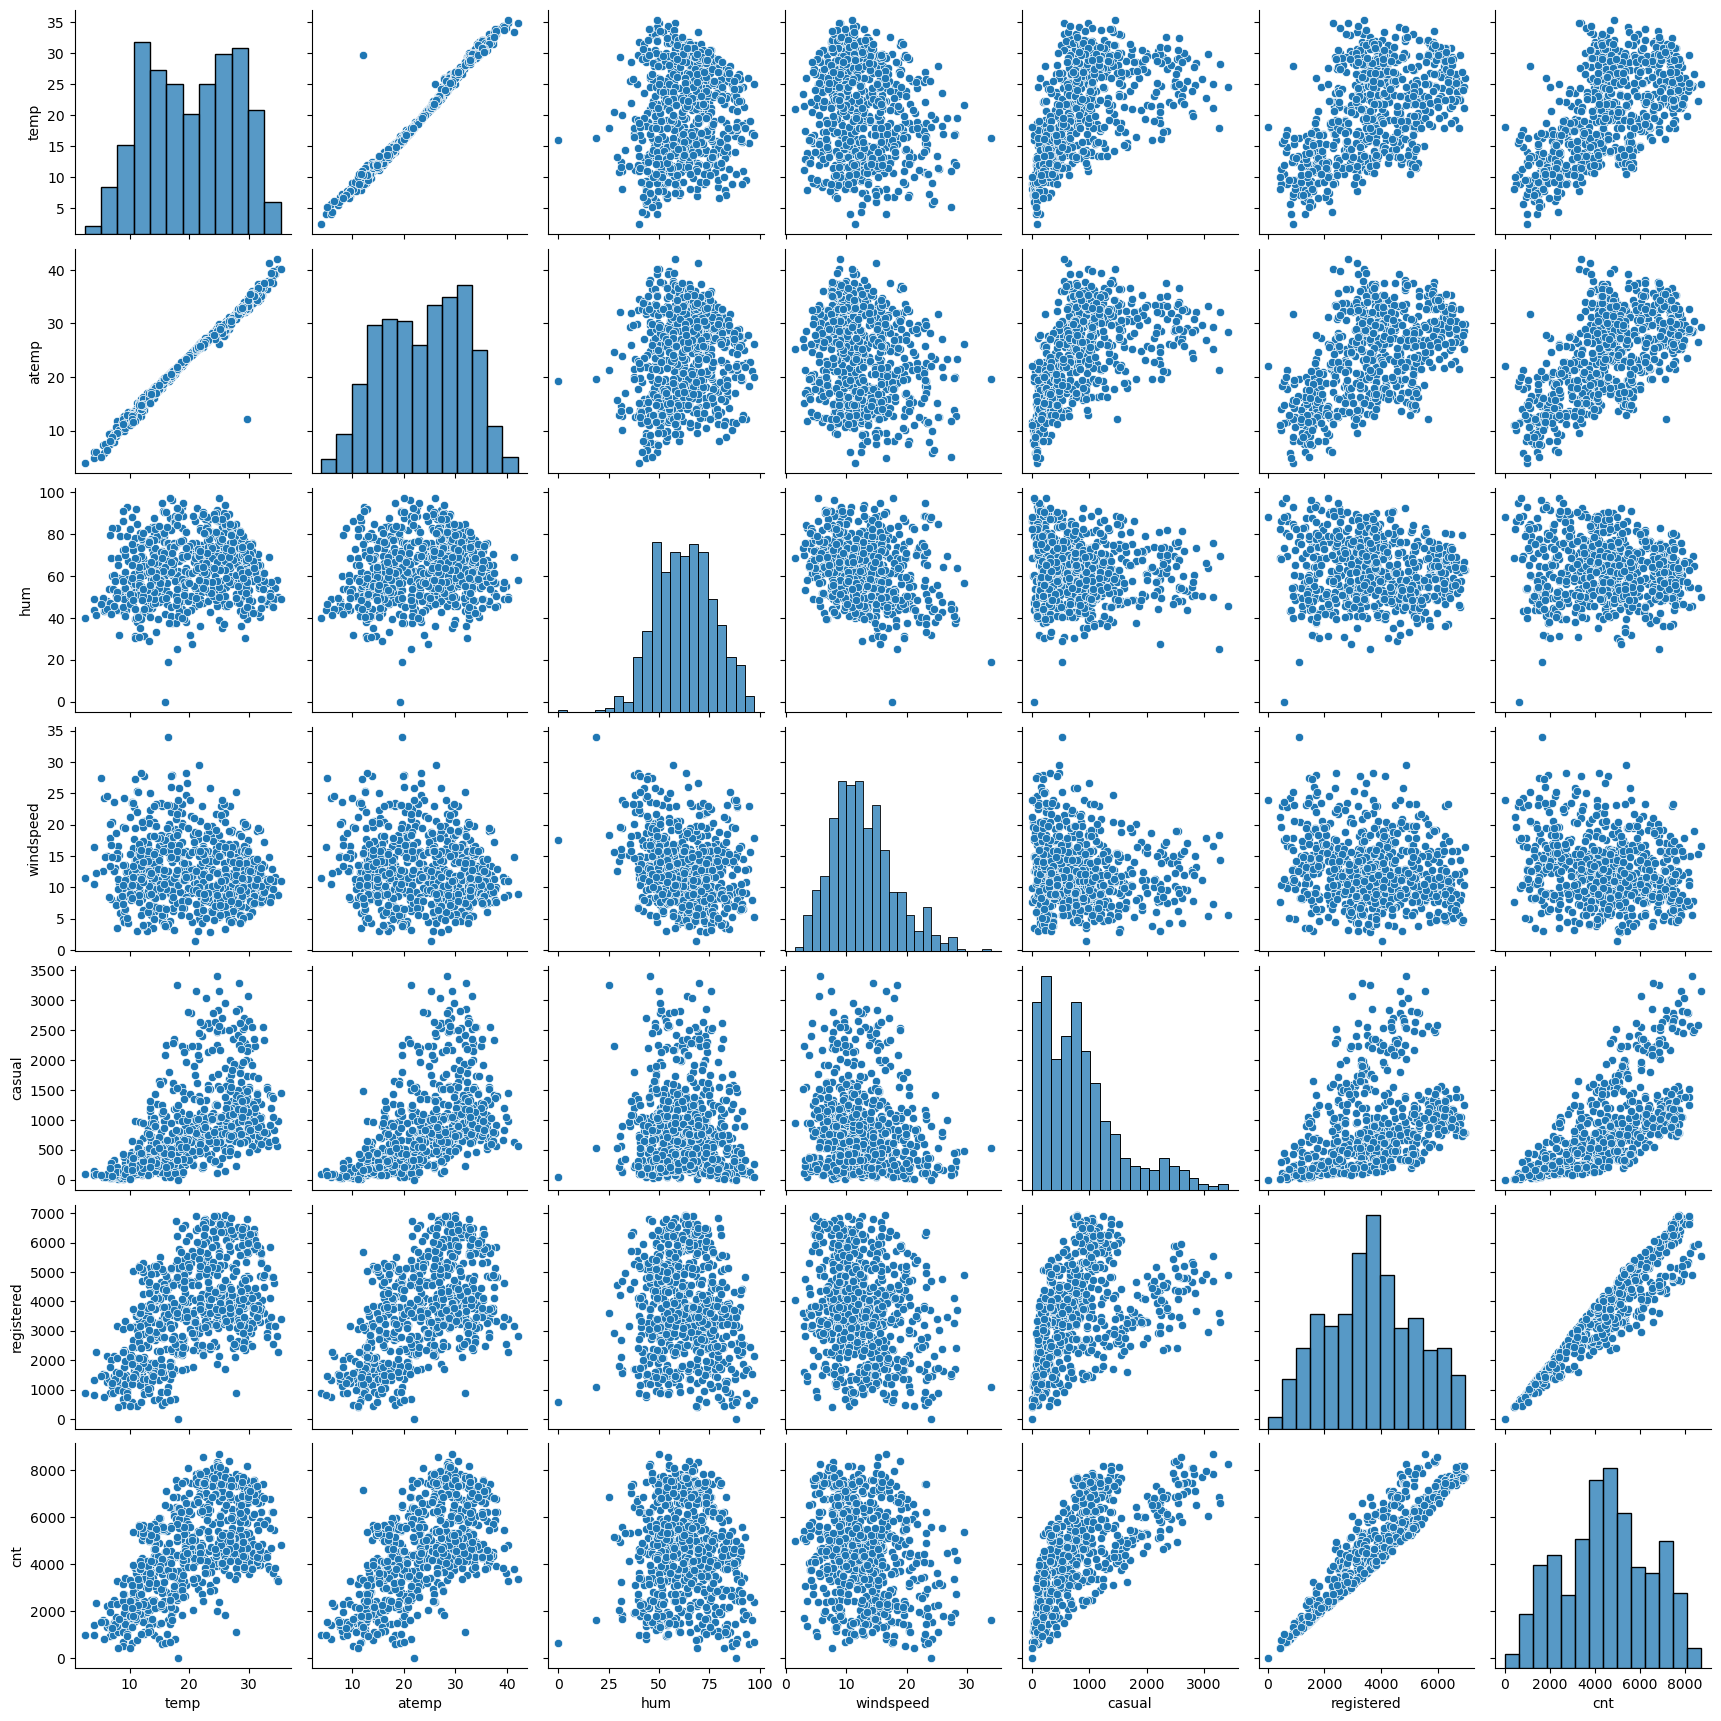

In [33]:
sns.pairplot(dt_numeric)
plt.show()

In [34]:
dt_cor = dt_numeric.corr()
dt_cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

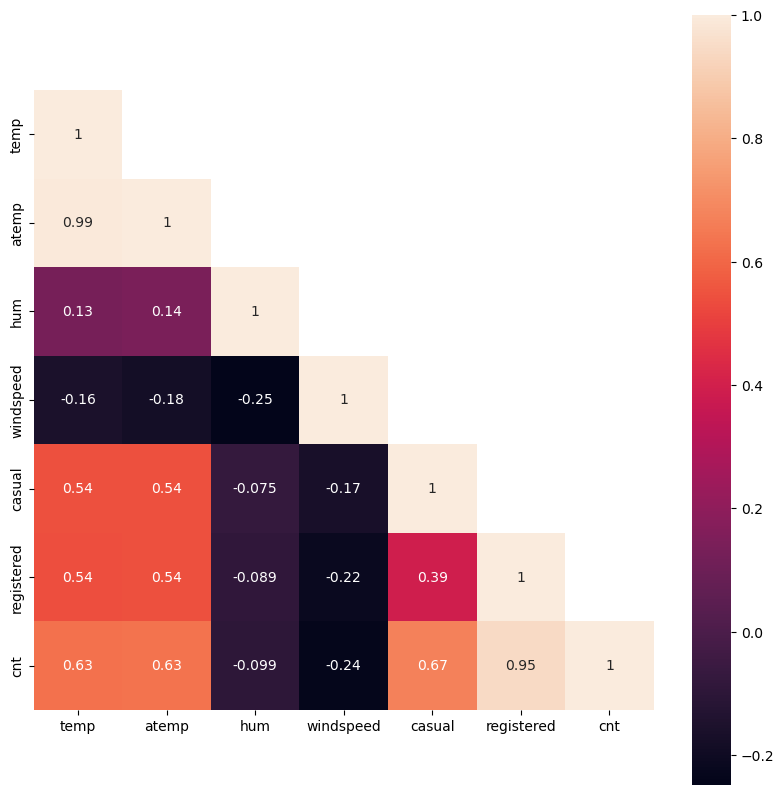

In [35]:
## heatmap
mask = np.array(dt_cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(dt_cor, mask = mask,vmax = 1, square = True, annot = True)

In [36]:
dt.drop('atemp', axis = 1, inplace = True)
dt.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,NaN,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [37]:
dt_categorical = dt.select_dtypes(include = ['object'])

In [38]:
dt_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,NaN,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [39]:
dt_dummies = pd.get_dummies(dt_categorical , drop_first= True)
dt_dummies = dt_dummies.astype(int)
dt_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Nov,mnth_Oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
dt = dt.drop(list(dt_categorical.columns),axis = 1)
dt

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [41]:
dt = pd.concat([dt,dt_dummies],axis= 1)

In [42]:
dt.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Nov,mnth_Oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,1,0,0,0,1,0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,1,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
dt = dt.drop(['instant','dteday'],axis = 1, inplace = False)
dt.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [45]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dt, train_size = 0.7, test_size=0.3, random_state=100)

In [46]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Nov,mnth_Oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,0,1,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,0,1,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
var = ['temp','windspeed','hum','casual','registered','cnt']
df_train[var] = scaler.fit_transform(df_train[var])

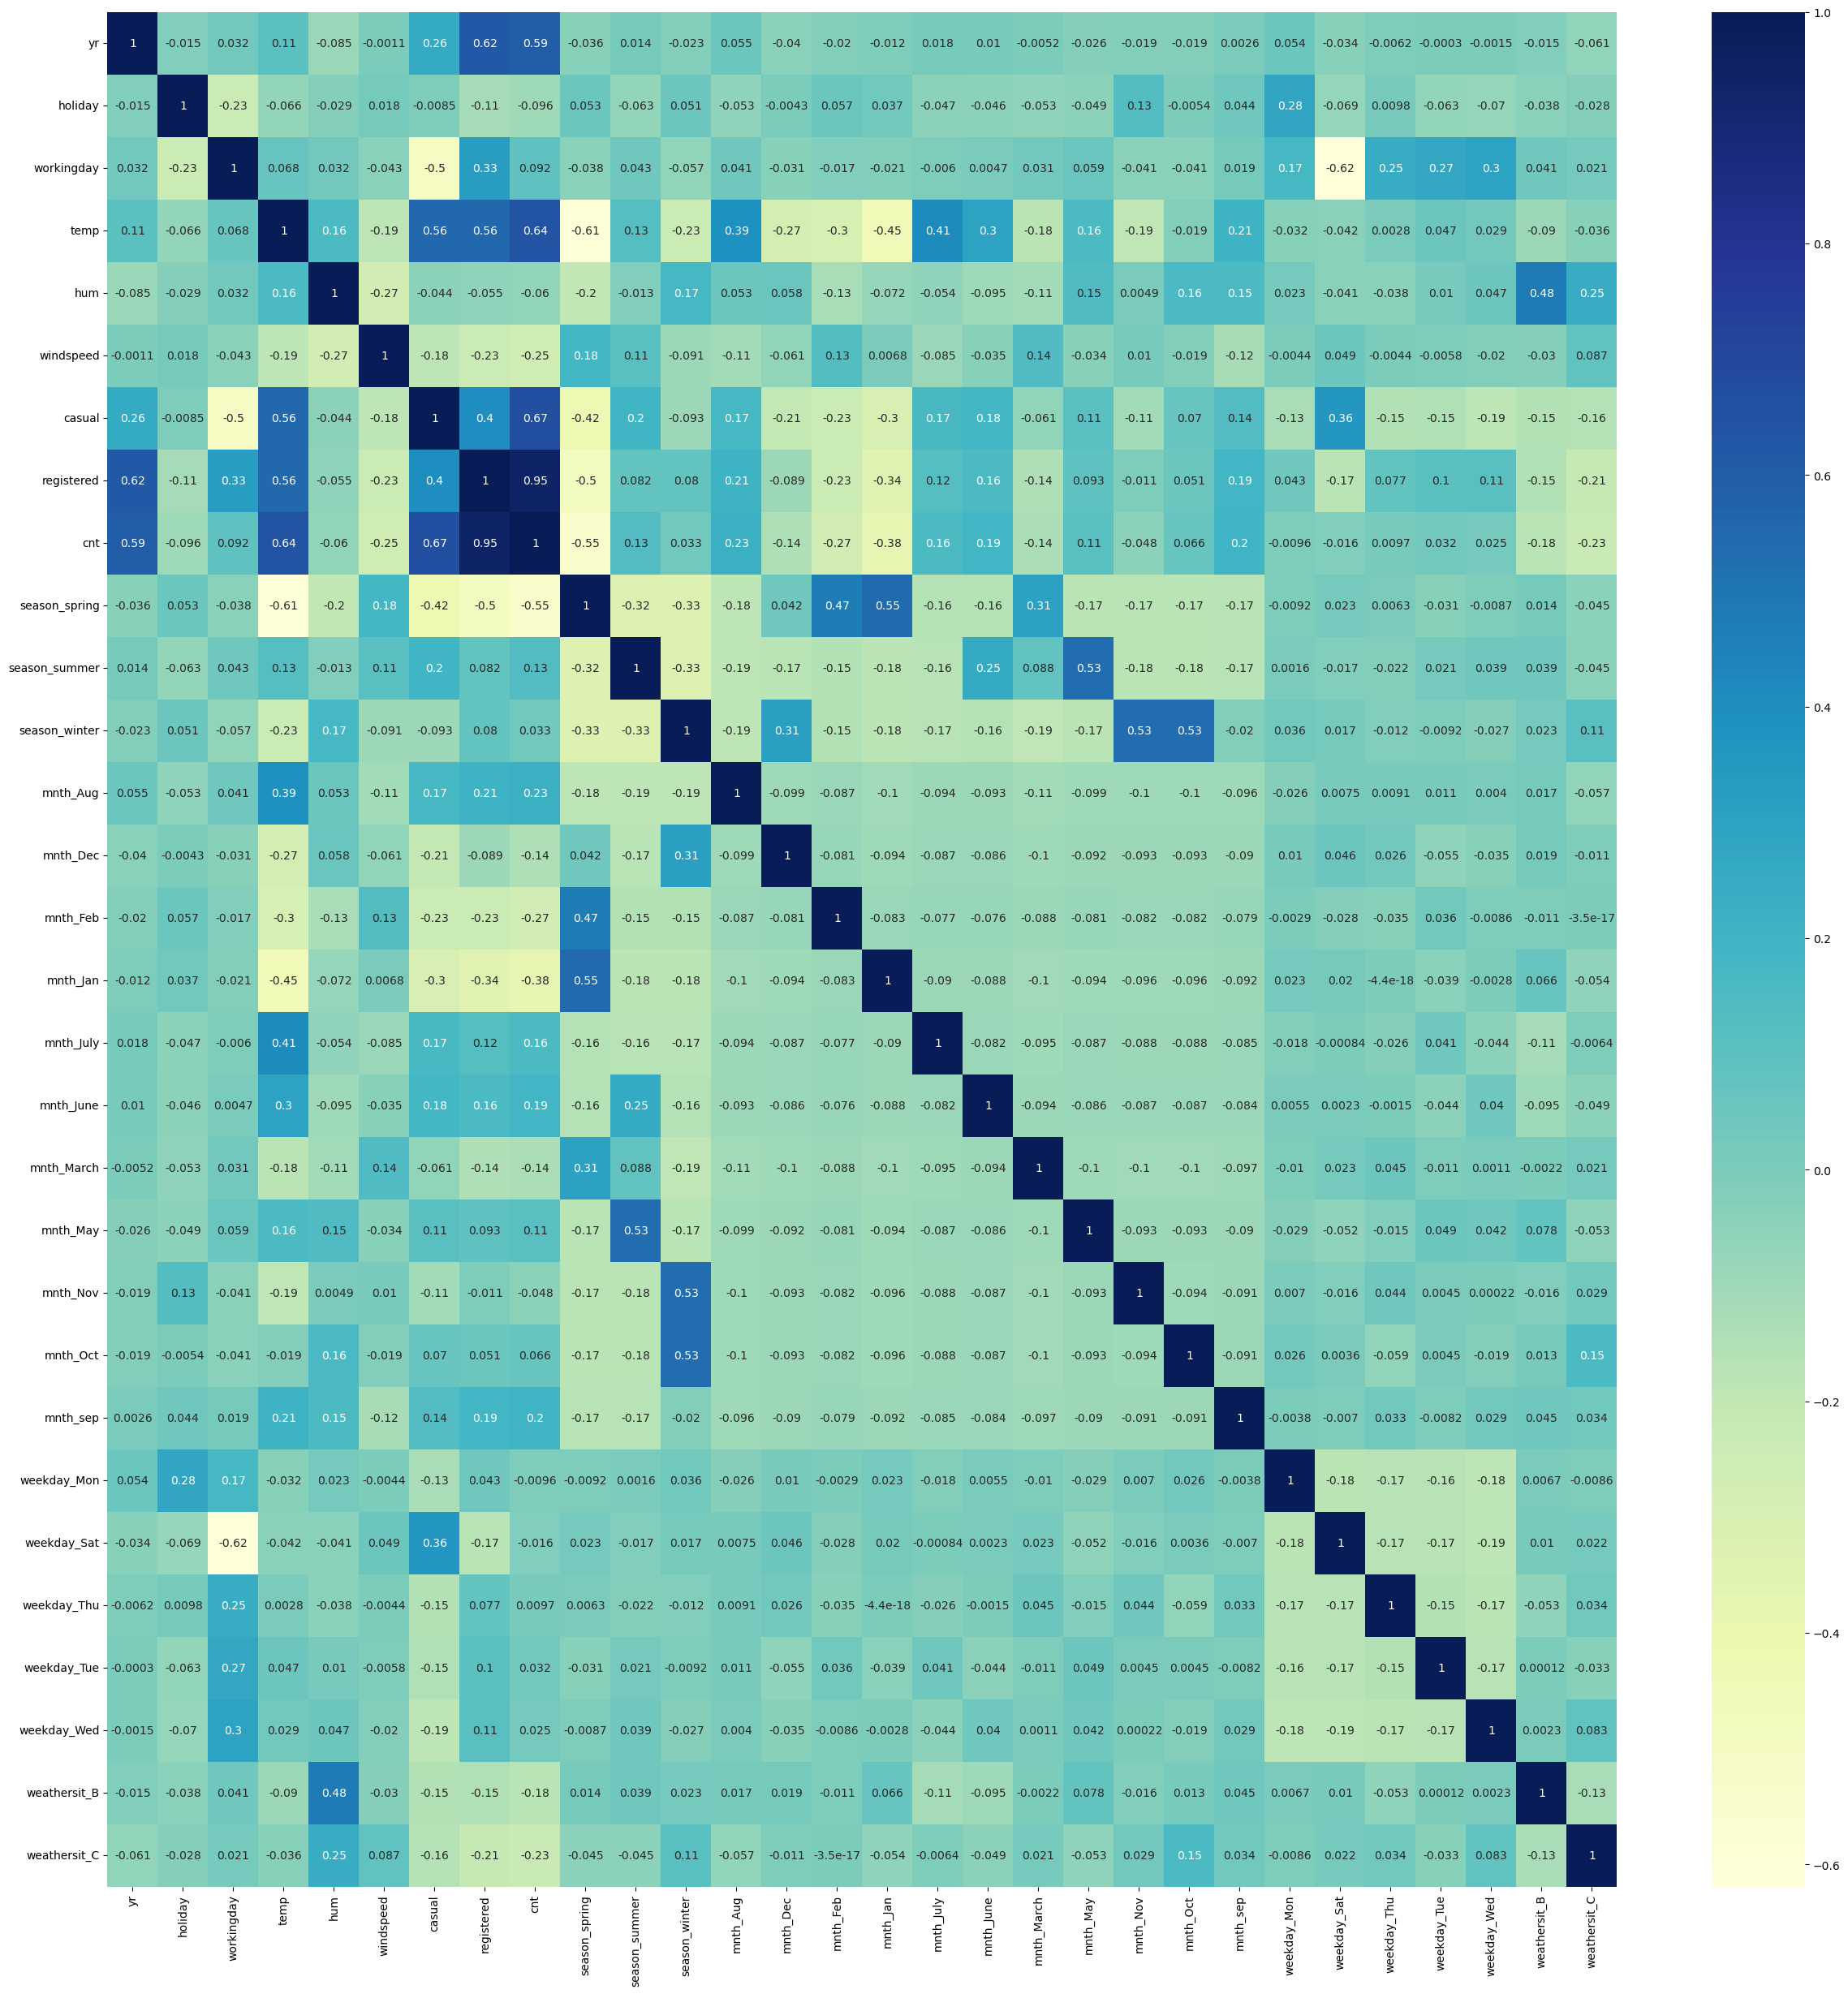

In [50]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot = True , cmap = "YlGnBu")
plt.show()

In [89]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("day.csv")


df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

X = df.drop(columns=['cnt'])
y = df['cnt']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(random_state=42)
selector = RFE(model, n_features_to_select=6)
X_selected = selector.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

r2, mae, mse, rmse


(0.8991833074079416, 463.3001369863014, 345079.6064890412, 587.4347678585608)